# QuantumDiamonds 2D Scan Demo

This notebook demonstrates a full 2D scan using the QuantumDiamonds scan controller.
- Loads configuration from `config.yaml`
- Runs a simulated scan
- Shows raw and filtered data
- Visualizes the results as a heatmap with detected peaks


## Imports

In [14]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scan_controller import MyScanController

## Load Configuration

In [15]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)
    
config

{'x_range': {'start': 0.0, 'end': 5.0, 'steps': 10},
 'y_range': {'start': 0.0, 'end': 5.0, 'steps': 10},
 'max_retries': 3,
 'stage_fail_rate': 0.5,
 'sensor_fail_rate': 0.3,
 'rolling_avg_window': 3,
 'smoothing': 'fast_mean',
 'peak_threshold': 0.8,
 'logging': {'level': 'INFO', 'file': 'scan.log'},
 'output': {'csv_file': 'out/scan_results.csv',
  'heatmap_file': 'out/heatmap.png'}}

In [16]:
# config['stage_fail_rate'] = 0.5  
# config['sensor_fail_rate'] = 0.3 

## Run the Scan

- Detailed logs for every move and measurement attempt.  
- If a move or measurement fails, the code retries up to the configured maximum.
- Each success or failure is printed, including the attempt number and reason for failure.
- This validates the retry logic.

In [17]:
# import numpy as np
# np.random.seed(42)

In [18]:
print("Instantiating scan controller...")
scan = MyScanController(config)

print("Starting scan...")
x_vals, y_vals, raw_data, filtered_data, global_peak, local_peaks, scan_time = scan.run_scan()
print(f"Scan completed in {scan_time:.2f} seconds.")

print("\n--- Full Scan Attempt Log ---")
for entry in scan.attempt_log:
    print(entry)

Attempt 1 failed: Stage timeout moving to (0.00,0.00)
Attempt 2 failed: Stage timeout moving to (0.00,0.00)


Instantiating scan controller...
Starting scan...


Failed to measure sensor data on attempt 1: Sensor read error
Failed to measure sensor data on attempt 2: Received None from sensor reading
Attempt 1 failed: Stage timeout moving to (1.11,0.00)
Attempt 2 failed: Stage timeout moving to (1.11,0.00)
Attempt 3 failed: Stage timeout moving to (1.11,0.00)
Failed to move to (1.1111111111111112, 0.0) after 3 attempts.
Failed to measure sensor data on attempt 1: Sensor read error
Attempt 1 failed: Stage timeout moving to (1.67,0.00)
Failed to measure sensor data on attempt 1: Sensor read error
Attempt 1 failed: Stage timeout moving to (2.78,0.00)
Failed to measure sensor data on attempt 1: Received None from sensor reading
Attempt 1 failed: Stage timeout moving to (3.33,0.00)
Attempt 2 failed: Stage timeout moving to (3.33,0.00)
Attempt 3 failed: Stage timeout moving to (3.33,0.00)
Failed to move to (3.3333333333333335, 0.0) after 3 attempts.
Attempt 1 failed: Stage timeout moving to (4.44,0.00)
Attempt 2 failed: Stage timeout moving to (4.44,


--- Full Scan Attempt Log ---
Move:   x=0.00, y=0.00, status=success, attempt=1, reason=
Measure: x=0.00, y=0.00, status=success, attempt=1, reason=, value=1.1256775282378946
Move:   x=0.56, y=0.00, status=success, attempt=1, reason=
Measure: x=0.56, y=0.00, status=success, attempt=1, reason=, value=1.0143295626268218
Move:   x=1.11, y=0.00, status=success, attempt=1, reason=
Measure: x=1.11, y=0.00, status=success, attempt=1, reason=, value=1.1605894936173575
Move:   x=1.67, y=0.00, status=success, attempt=1, reason=
Measure: x=1.67, y=0.00, status=success, attempt=1, reason=, value=1.2946575836979322
Move:   x=2.22, y=0.00, status=success, attempt=1, reason=
Measure: x=2.22, y=0.00, status=success, attempt=1, reason=, value=0.8477329663711684
Move:   x=2.78, y=0.00, status=success, attempt=1, reason=
Measure: x=2.78, y=0.00, status=success, attempt=1, reason=, value=1.1017861529780717
Move:   x=3.33, y=0.00, status=success, attempt=1, reason=
Measure: x=3.33, y=0.00, status=success,

## Print Attempt Log and Debug Info

In [19]:
print("Number of scan attempts logged:", len(scan.attempt_log))
# How many retries were needed?
failures = [e for e in scan.attempt_log if e['status'] == 'fail']
print(f"Total failures (requiring retry): {len(failures)}")

Number of scan attempts logged: 201
Total failures (requiring retry): 1


In [ ]:
# %pip install pandas

In [21]:
import pandas as pd

df = pd.DataFrame(scan.attempt_log)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("==== FULL ATTEMPT LOG (ALL MOVES AND MEASUREMENTS, ALL ATTEMPTS) ====")
print(df)

# Print only failed attempts (for quick error review)
print("\n==== ALL FAILED ATTEMPTS ====")
failures = df[df['status'] == 'fail']
print(failures[['x', 'y', 'type', 'attempt', 'reason']])

# Print only measurement attempts where value is NaN (even if status is 'success')
print("\n==== ALL MEASUREMENT ATTEMPTS WITH NaN VALUE ====")
nan_measures = df[(df['type'] == 'measure') & (df['value'].isnull())]
print(nan_measures[['x', 'y', 'type', 'attempt', 'status', 'reason']])

# Print summary: how many times each error occurred, at which points
print("\n==== ERROR SUMMARY BY TYPE, REASON, AND POINT ====")
error_summary = (
    failures
    .groupby(['type', 'reason', 'x', 'y'])
    .size()
    .reset_index(name='retry_count')
)
print(error_summary)

try:
    from tabulate import tabulate
    print("\n==== ERROR SUMMARY ====")
    print(tabulate(error_summary, headers='keys', tablefmt='github'))
except ImportError:
    pass  
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

==== FULL ATTEMPT LOG (ALL MOVES AND MEASUREMENTS, ALL ATTEMPTS) ====
            x         y     type   status  attempt  \
0    0.000000  0.000000     move  success        1   
1    0.000000  0.000000  measure  success        1   
2    0.555556  0.000000     move  success        1   
3    0.555556  0.000000  measure  success        1   
4    1.111111  0.000000     move  success        1   
5    1.111111  0.000000  measure  success        1   
6    1.666667  0.000000     move  success        1   
7    1.666667  0.000000  measure  success        1   
8    2.222222  0.000000     move  success        1   
9    2.222222  0.000000  measure  success        1   
10   2.777778  0.000000     move  success        1   
11   2.777778  0.000000  measure  success        1   
12   3.333333  0.000000     move  success        1   
13   3.333333  0.000000  measure  success        1   
14   3.888889  0.000000     move  success        1   
15   3.888889  0.000000  measure  success        1   
16   4.44444

- **Failures:** Lines like `Attempt 1 failed: Stage timeout moving to (x, y)` show simulated hardware faults.
- **Retries:** Lines like `Successfully moved to (x, y) on attempt 2.` show the retry logic working.
- **Measurement failures:** Lines like `Failed to measure sensor data on attempt 1: Sensor read error` show sensor issues and recovery.
- **Successes:** Every successful move and measurement is printed with the value.
- **Analysis of Retry Behavior:**  Some points required multiple retries, indicating areas where the simulated hardware is less reliable. This confirms that  retry logic is exercised and working as intended.


## Data Loading

In [22]:
df = pd.read_csv('out/scan_results.csv')
print("Columns:", df.columns)
print("\nFirst few rows:")
print(df.head())

Columns: Index(['x', 'y', 'raw_value', 'filtered_value'], dtype='object')

First few rows:
          x    y  raw_value  filtered_value
0  0.000000  0.0   1.217630        0.963307
1  0.555556  0.0   0.647203        1.020610
2  1.111110  0.0   1.183510        1.027550
3  1.666670  0.0   1.004910        1.093260
4  2.222220  0.0   0.982372        0.979103


## Data Visualization: Raw vs. Filtered Plot

The plot shows how the rolling average filter smooths out noise in the raw sensor data.

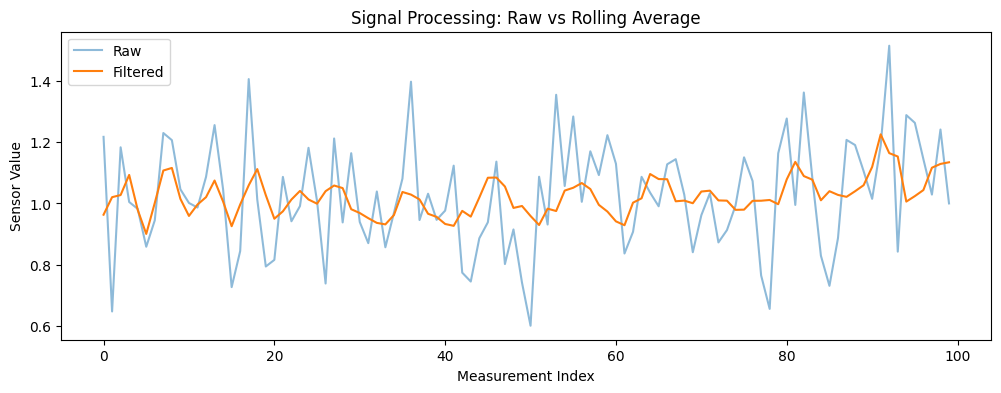

In [23]:
plt.figure(figsize=(12,4))
plt.plot(df['raw_value'], label='Raw', alpha=0.5)
plt.plot(df['filtered_value'], label='Filtered')
plt.title("Signal Processing: Raw vs Rolling Average")
plt.xlabel("Measurement Index")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()

**Raw data:** Unprocessed sensor values, potentially noisy.

**Filtered data:** Smoothed or averaged values, with noise reduced for clearer analysis and visualization

In [35]:
print("Raw data shape:", raw_data.shape)
print("Filtered data shape:", filtered_data.shape)

Raw data shape: (10, 10)
Filtered data shape: (10, 10)


### Print Raw Data Sample

In [25]:
print("Raw data shape:", raw_data.shape)
print("Filtered data shape:", filtered_data.shape)

Raw data shape: (10, 10)
Filtered data shape: (10, 10)


In [26]:
# First 5 rows collected by the sensor
print(raw_data[:5, :5])

[[1.12567753 1.01432956 1.16058949 1.29465758 0.84773297]
 [1.00524084 1.08695755 0.74709646 1.09912128 0.70934677]
 [1.03671617 0.85014348 0.87366784 1.01345921 0.76031959]
 [1.21678693 0.96558343 1.09567264 0.99207843 0.91259794]
 [0.9687045  0.94623037 1.05057997 1.07593948 1.04377989]]


### Print Filtered Data Sample

In [27]:
print(filtered_data[:5, :5])

[[1.05805137 1.02331524 1.06712532 0.97642409 1.02748694]
 [1.01984419 0.98893544 1.01555805 0.94511013 1.0052582 ]
 [1.02690473 0.98642948 0.96930892 0.91148446 0.93823792]
 [0.99736081 1.00045392 0.98481721 0.97978833 0.98626595]
 [1.03224718 1.02416642 0.99653292 0.99929019 0.9678013 ]]


### Peak Detection Debug 

**The peak detection threshold** is the minimum value a local maximum must exceed to be considered a peak. This helps distinguish true signal peaks from noise.

**The global peak** is the highest value in the filtered data, indicating the most prominent feature or signal in your scan.

**Local peaks** above threshold are all other significant features detected in your data that exceed the threshold, helping identify multiple regions of interest.

The listed coordinates (indices) show where these peaks are located in 2D scan grid.

In [28]:
print(f"Peak detection threshold: {config.get('peak_threshold', 'not set')}")
gx, gy = global_peak
print(f"Global peak at x={x_vals[gy]:.2f}, y={y_vals[gx]:.2f}, value={filtered_data[global_peak]:.3f}")
print(f"Number of local peaks above threshold: {len(local_peaks)}")
if local_peaks:
    print("First 5 local peaks:", local_peaks[:5])
else:
    print("No local peaks detected above threshold.")

Peak detection threshold: 0.8
Global peak at x=5.00, y=0.00, value=1.204
Number of local peaks above threshold: 5
First 5 local peaks: [(np.int64(3), np.int64(9)), (np.int64(5), np.int64(5)), (np.int64(7), np.int64(5)), (np.int64(9), np.int64(6)), (np.int64(9), np.int64(8))]


### Data Visualization: 2D Heatmap

This heatmap visualizes the spatial distribution of the filtered sensor values across the scanned area, highlighting regions of high and low response.

**Filtered Data Heatmap with Peaks:**
This plot displays a heatmap of the filtered (smoothed) data using color to represent signal intensity, with red dots marking the positions of detected local peaks above the threshold

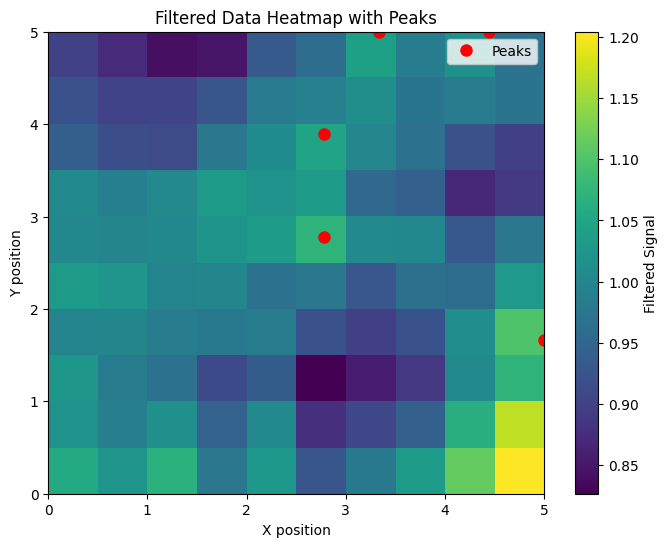

In [29]:
plt.figure(figsize=(8, 6))
plt.imshow(filtered_data, extent=[x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Filtered Signal')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Filtered Data Heatmap with Peaks')

if local_peaks:
    peak_x = [x_vals[j] for i, j in local_peaks]
    peak_y = [y_vals[i] for i, j in local_peaks]
    plt.plot(peak_x, peak_y, 'ro', markersize=8, label='Peaks')
    plt.legend()
plt.show()


**Raw Data Heatmap:**
This plot shows a heatmap of the unprocessed (raw) sensor data, allowing to visually assess the original signal distribution and noise levels across the scan area

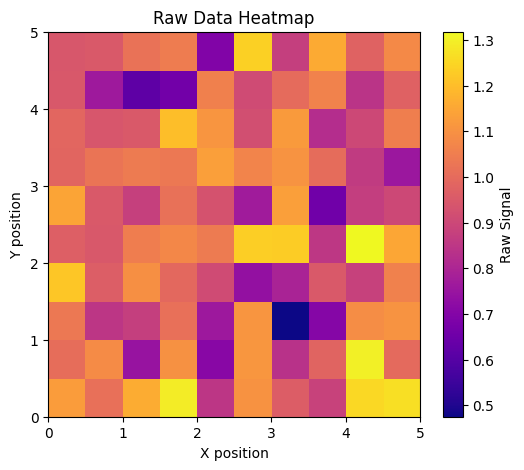

In [30]:
plt.figure(figsize=(6, 5))
plt.imshow(raw_data, extent=[x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]],
           origin='lower', aspect='auto', cmap='plasma')
plt.colorbar(label='Raw Signal')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Raw Data Heatmap')
plt.show()


**Filtered Data Heatmap:**

The heatmap visualizes the spatial distribution of filtered sensor values, highlighting regions of high and low response.

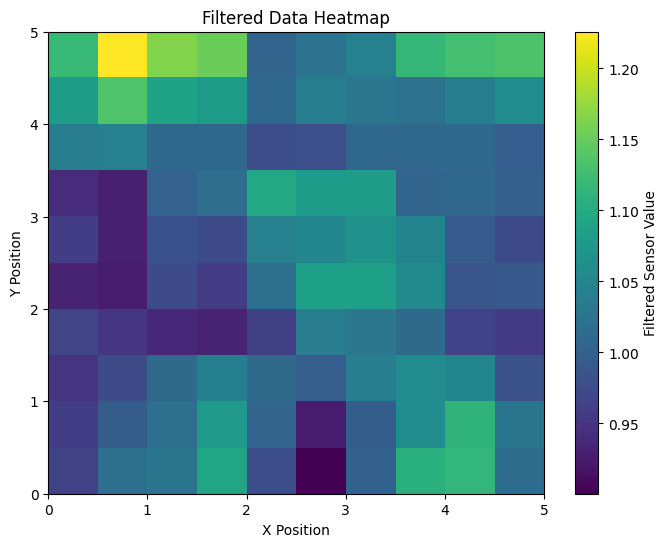

In [31]:
# heatmap of the filtered sensor values
x_unique = np.sort(df['x'].unique())
y_unique = np.sort(df['y'].unique())
nx = len(x_unique)
ny = len(y_unique)

heatmap = df.pivot(index='y', columns='x', values='filtered_value').values

plt.figure(figsize=(8,6))
plt.imshow(heatmap, origin='lower', extent=[x_unique[0], x_unique[-1], y_unique[0], y_unique[-1]], aspect='auto')
plt.colorbar(label='Filtered Sensor Value')
plt.title("Filtered Data Heatmap")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

## Data Analysis: Peak Detection

This cell identifies and reports the location and value of the highest filtered sensor reading, indicating the most sensitive or interesting point in the scan.

In [32]:
peak_idx = df['filtered_value'].idxmax()
peak_x = df.loc[peak_idx, 'x']
peak_y = df.loc[peak_idx, 'y']
peak_val = df.loc[peak_idx, 'filtered_value']
print(f"Global peak (filtered): value={peak_val:.4f} at (x={peak_x:.4f}, y={peak_y:.4f})")

Global peak (filtered): value=1.2259 at (x=0.5556, y=5.0000)


## Conclusion

In [33]:
summary = {
    "Total points measured": len(df),
    "Max filtered value": df['filtered_value'].max(),
    "Peak location (x, y)": (peak_x, peak_y)
}
print(summary)

{'Total points measured': 100, 'Max filtered value': np.float64(1.22585), 'Peak location (x, y)': (np.float64(0.555556), np.float64(5.0))}


- Total points measured: 100

- Max filtered value: 1.22585
The highest filtered sensor reading across all positions.

- Peak location (x, y): (0.555556, 5.0)
The position with the strongest sensor response.

This notebook demonstrates a robust 2D scan using the QuantumDiamonds controller, including:
- Reliable retry logic for both movement and measurement, with detailed logging of all attempts and errors.
- Clear distinction and visualization of raw versus filtered data, highlighting the benefits of noise reduction.
- Automated detection and reporting of global and local signal peaks, using a configurable threshold.
- Comprehensive error analysis and full traceability of every scan attempt.

 ## Save Processed Data

In [34]:
df.to_csv('out/scan_results_processed.csv', index=False)